In [21]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
import cv2

In [22]:
from facenet_models import FacenetModel

# this will download the pretrained weights for MTCNN and resnet
# (if they haven't already been fetched)
# which should take just a few seconds
model = FacenetModel()

## Importing Face 1

pic shape: (562, 450, 3)


<IPython.core.display.Javascript object>


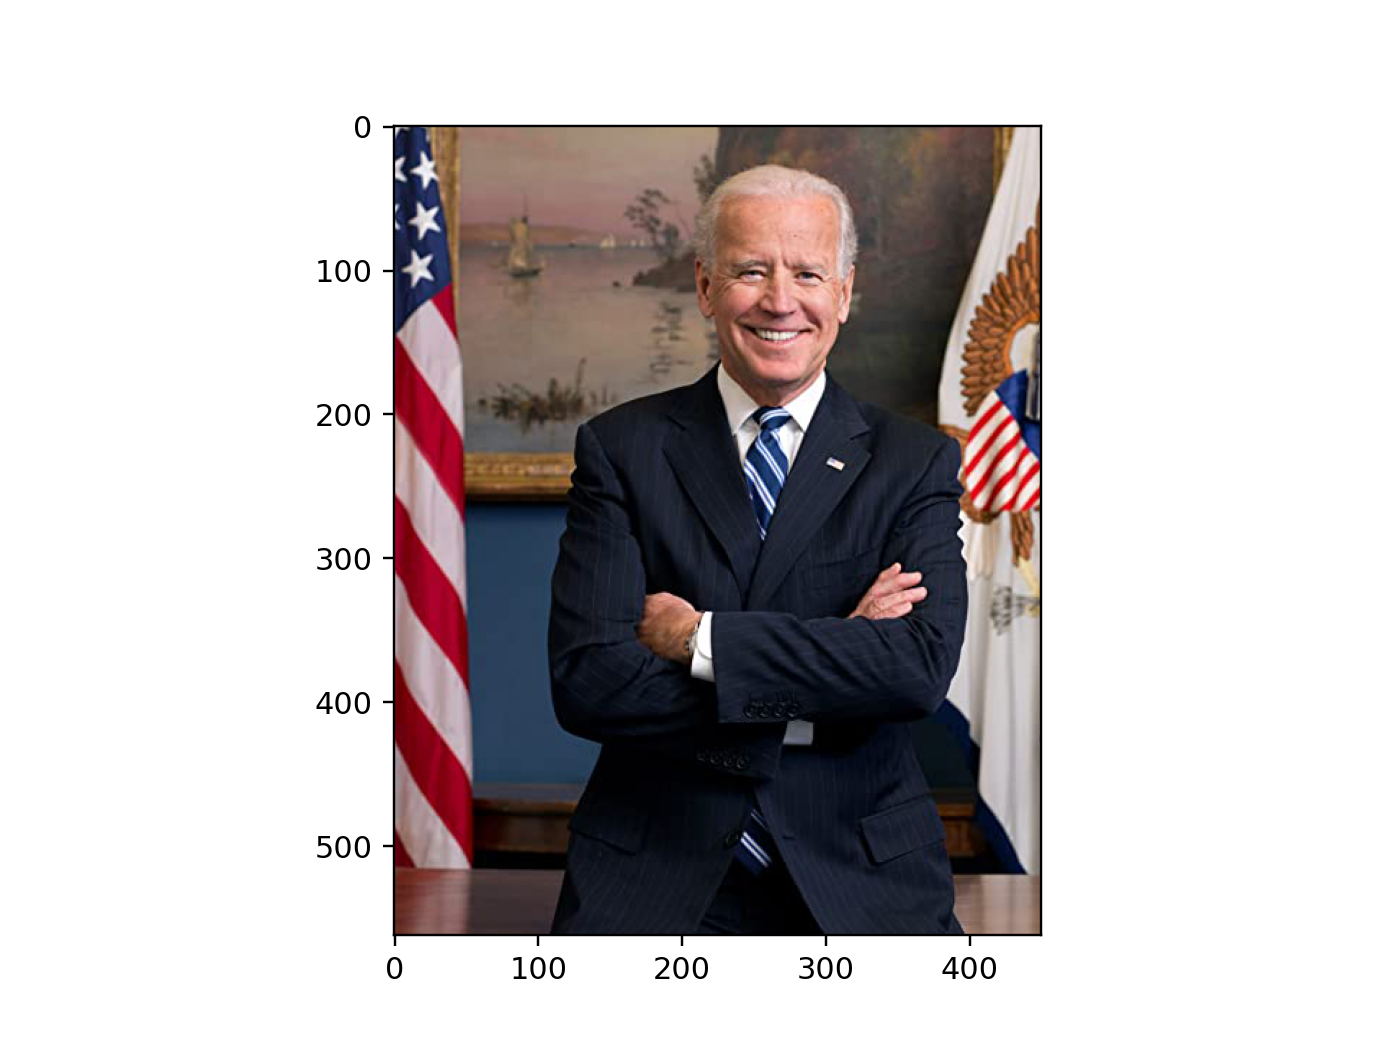

In [32]:
pic = cv2.imread("database/JB/10.jpg")[:,:,::-1] # The slicing part converts the BGR image to RGB
#cv2.imshow("test", pic) # Will have a window pop-up of the image. Press any key to continue
#cv2.waitKey(0)
#cv2.destroyAl|lWindows()
print("pic shape:", pic.shape)
plt.imshow(pic)

In [29]:
# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
#
# If N faces are detected then arrays of N boxes, N probabilities, and N landmark-sets
# are returned.
boxes, probabilities, landmarks = model.detect(pic)

print(f"Number of faces detected: {len(boxes)}")
print("Probabilities:", probabilities)

Number of faces detected: 1
Probabilities: [0.9999074]


<IPython.core.display.Javascript object>


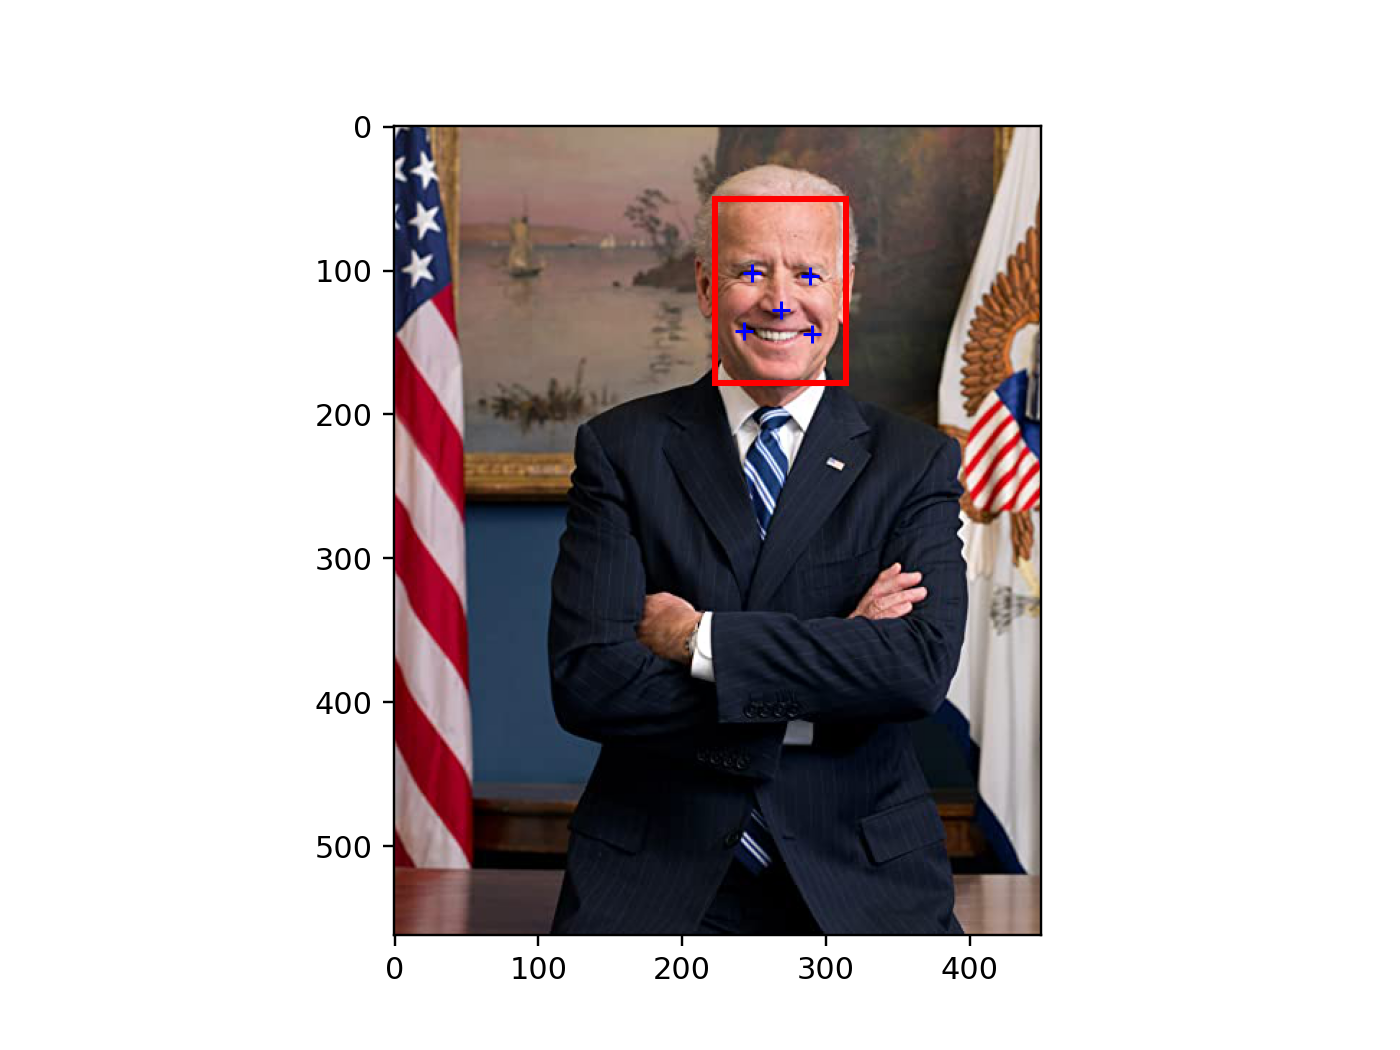

In [30]:
# SHOWING FACE RECTANGLES
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic)


for box, prob, landmark in zip(boxes, probabilities, landmarks):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

In [43]:
# let's take a look as to what the descriptor is!!
descriptor = model.compute_descriptors(pic, boxes) # Producing the descriptor vector
descriptor = descriptor.reshape(512)
print(descriptor.shape)
#print(descriptor)

(512,)


## Importing Face 2

pic2 shape: (1499, 1499, 3)


<IPython.core.display.Javascript object>


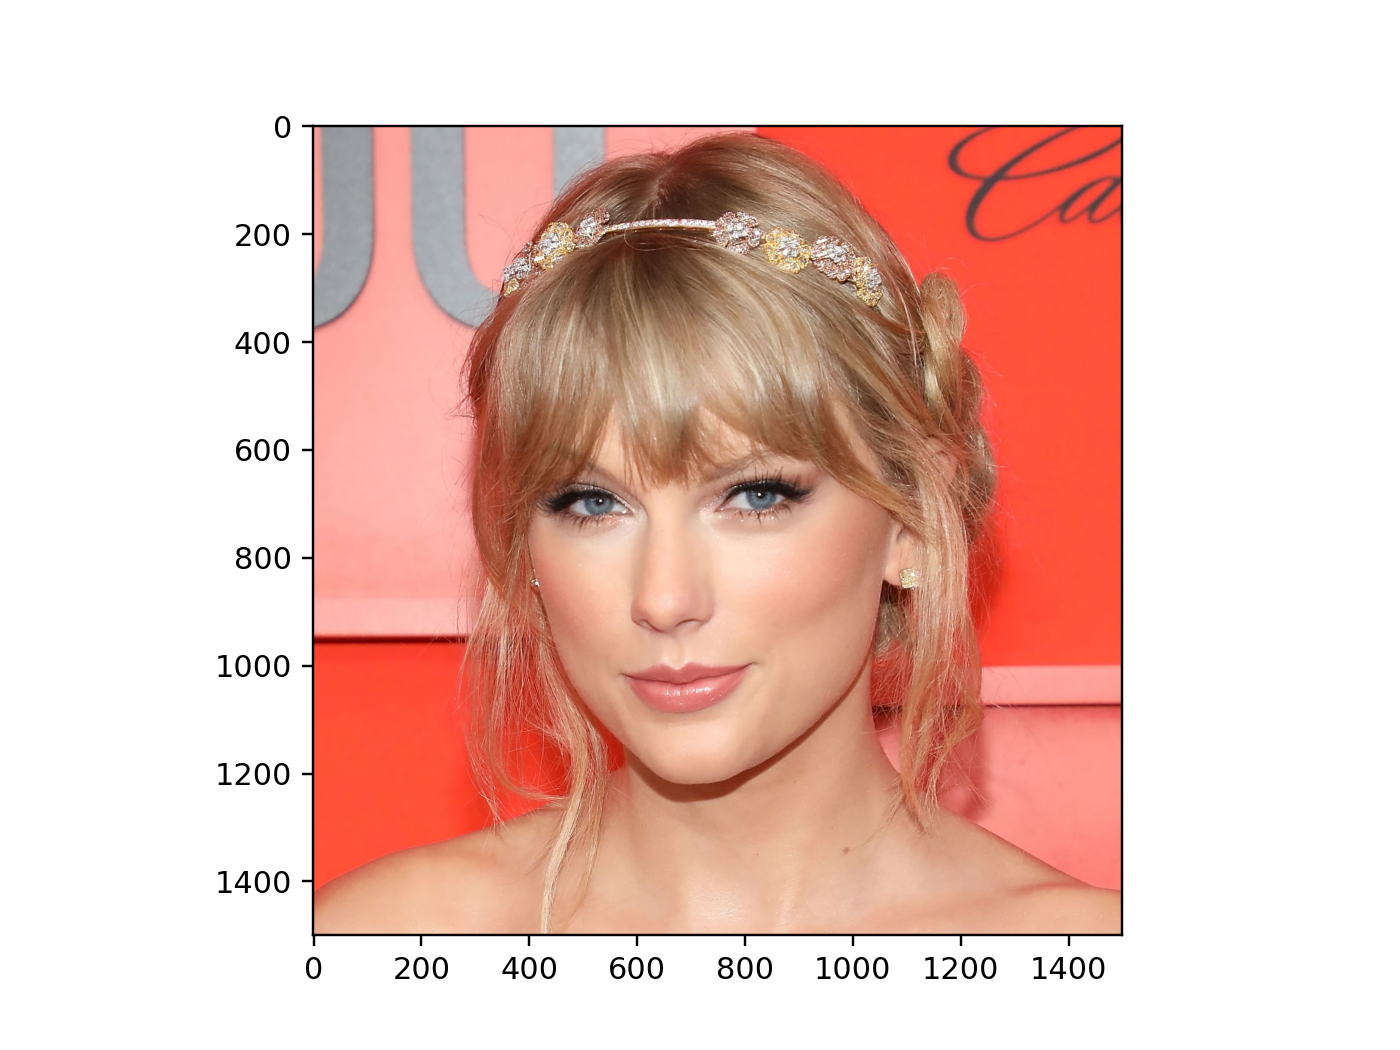

In [64]:
pic2 = cv2.imread("database/TS/3.jpg")[:,:,::-1] # The slicing part converts the BGR image to RGB
#cv2.imshow("test", pic) # Will have a window pop-up of the image. Press any key to continue
#cv2.waitKey(0)
#cv2.destroyAllWindows()
print("pic2 shape:", pic2.shape)
plt.imshow(pic2)

In [65]:
# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
#
# If N faces are detected then arrays of N boxes, N probabilities, and N landmark-sets
# are returned.
boxes2, probabilities2, landmarks2 = model.detect(pic2)

print(f"Number of faces detected: {len(boxes2)}")
print("Probabilities:", probabilities2)

Number of faces detected: 1
Probabilities: [0.9891878]


<IPython.core.display.Javascript object>


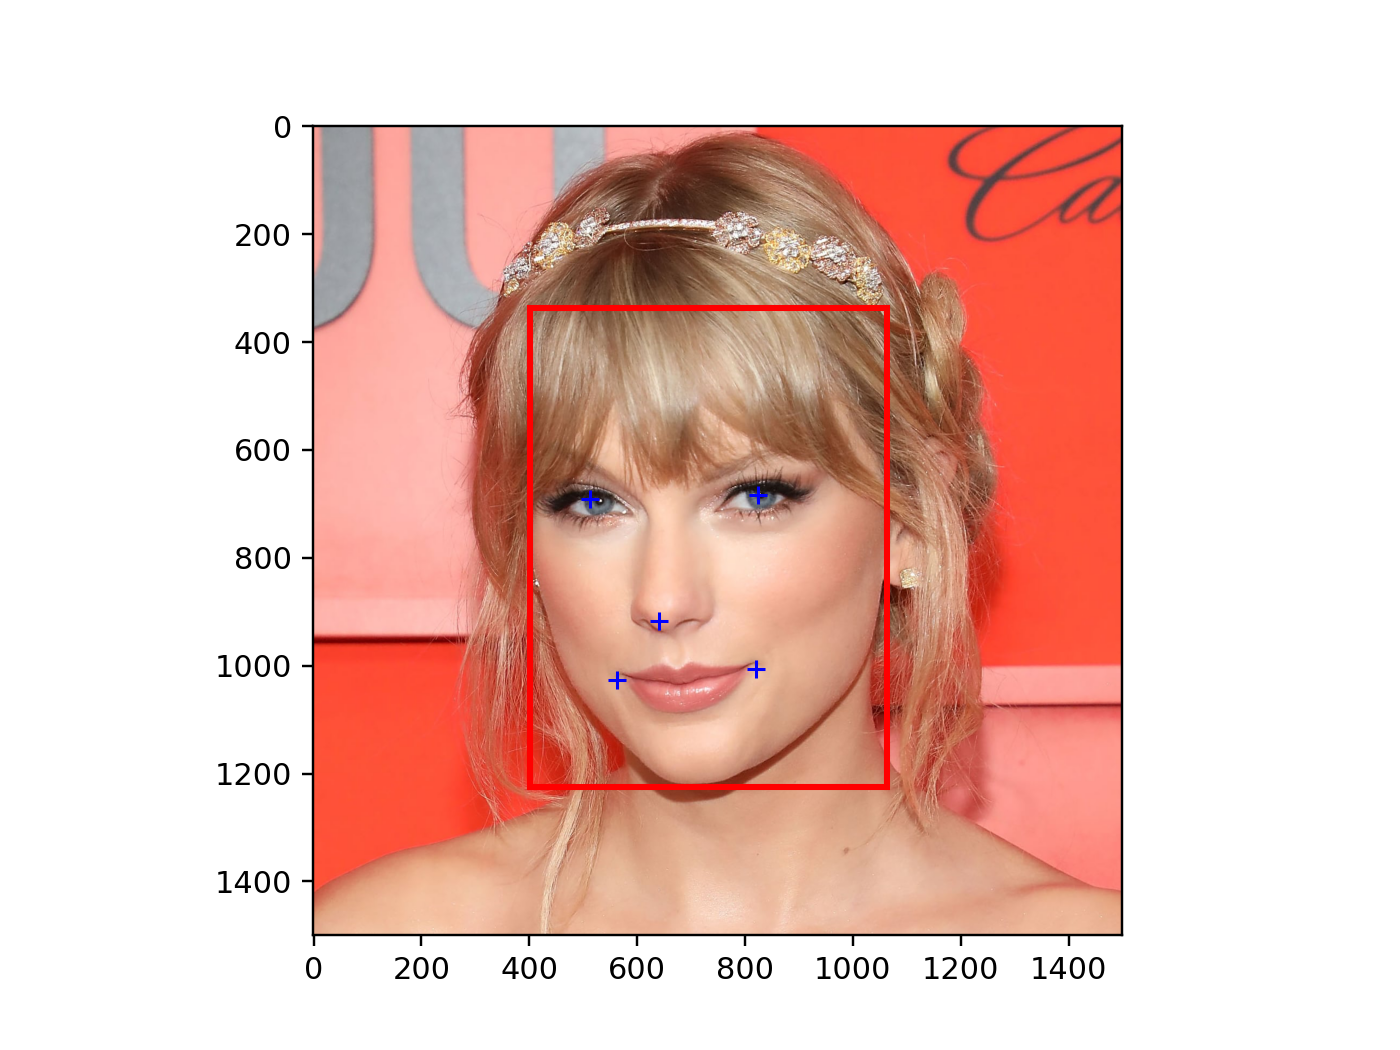

In [66]:
# SHOWING FACE RECTANGLES
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic2)


for box, prob, landmark in zip(boxes2, probabilities2, landmarks2):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

In [67]:
# let's take a look as to what the descriptor is!!
descriptor2 = model.compute_descriptors(pic2, boxes2) # Producing the descriptor vector
descriptor2 = descriptor2.reshape(512)
print(descriptor2.shape)
#print(descriptor)

(512,)


## Comparing the two faces

In [68]:
import numpy as np
import mygrad as mg

In [69]:
def cos_distance(d_avg, d_test):
    d_avg_normalized = d_avg / np.linalg.norm(d_avg)
    d_test_normalized = d_test / np.linalg.norm(d_test)
    
    # print(d_avg_normalized)
    # print(d_test_normalized)
    
    numerator = np.dot(d_avg_normalized, d_test_normalized)
    d_avg_mag = np.sqrt(np.dot(d_avg_normalized, d_avg_normalized))
    d_test_mag = np.sqrt(np.dot(d_test_normalized, d_test_normalized))
    
    return 1 - numerator # / (d_avg_mag * d_test_mag)

In [70]:
cos_dist = cos_distance(descriptor, descriptor2)
print(cos_dist)

1.076243706047535
